In [1]:
import lense_thirring_tools as lt
import numpy as np
import matplotlib.pyplot as plt

(133, 4)


/tmp/ipykernel_41729/1479176590.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


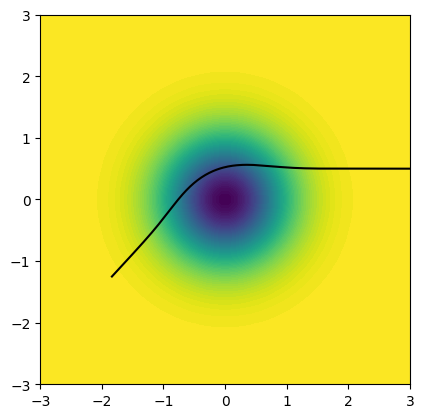

In [4]:
lt.set_params_gaußian_surface(1/np.sqrt(2),A=2.0)
ts,zs = lt.get_geodesic(6, np.array([3,0.5,-1,0]),tol=1e-9,accF=lt.acc_gaußian_surface,check_break=lambda t,r: np.abs(r[0])>3 or np.abs(r[1])>3)
print(zs.shape)

N = 50
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-3.0, 3.0, N)
X, Y = np.meshgrid(x, y)
Z = lt.z_gaußian_surface(X,Y)

fig,ax = plt.subplots(1,1)
ax.plot(zs[:,0],zs[:,1],c='k')
ax.contourf(X,Y,Z,100,cmap='viridis')
ax.set_aspect(1)
fig.show()

In [31]:
from scipy.spatial.transform import Rotation
def rotate_vector(vector, angle, axis):
    rot = Rotation.from_rotvec(angle * np.array(axis) / np.linalg.norm(axis))
    return np.dot(vector, rot.as_matrix().T)


target = np.array([-0.2,0.3,-0.2])
length = np.linalg.norm(target)
vec = (0,0,length)
vec = rotate_vector(vec, np.arccos(target[2]/length), axis=(1,0,0))
vec = rotate_vector(vec, np.arctan2(target[1], target[0])+np.pi/2, axis=(0,0,1))
print(vec)

[-0.2  0.3 -0.2]
